In [1]:
from types import *
from dataloader import *
from util import *
from graphs import *
from agreement import *
from scoring import *

# There's also 'tutorial' and 'preliminary' data
data = load_data('../annotated', preprocess=True)

Loading files: ['../annotated/batch_1_anton.json', '../annotated/batch_1_ayush.json', '../annotated/batch_1_kelly.json', '../annotated/batch_2_vinayak.json', '../annotated/batch_2_vishnesh.json', '../annotated/batch_3_anton.json', '../annotated/batch_3_ayush.json', '../annotated/batch_3_kelly.json', '../annotated/batch_4_rachel.json', '../annotated/batch_4_vinayak.json', '../annotated/batch_4_vishnesh.json']

Found users: {'anton', 'ayush', 'kelly', 'vinayak', 'vishnesh', 'rachel'}

Couldn't process grammar for substitution: ['positive', '', '', '']. Assuming 'no'...
Couldn't process positive rating for substitution: ['positive', '', '', '']. Assuming 'somewhat'...
Couldn't process grammar for substitution: ['positive', 'minor', '', '']. Assuming 'no'...
Couldn't process grammar for deletion: ['good', 'no', '']. Assuming 'no'...
Couldn't process grammar for deletion: ['good', 'no', '']. Assuming 'no'...
Couldn't process grammar for deletion: ['perfect', 'no', '']. Assuming 'no'...
Coul

In [2]:
# Print spans with comments
get_comments(data)

ANTON - HIT 19: in this case later baptised is a perfect deletion, but in other cases it might not be. 


AYUSH - HIT 10: There is no change from the original sentence to simplified sentence

AYUSH - HIT 15: Seems to think the original sentence is talking about a game?

AYUSH - HIT 25: It's the same sentence just duplicated twice

KELLY - HIT 6: This original sentence doesn't really make geographic sense. Tajikistan, Turmenistan, and Uzbekistan are north of both Afghanistan and Pakistan, east of Iran, and west of China.

KELLY - HIT 10: No change?

KELLY - HIT 15: This hit keeps breaking the interface for me, so I'm not sure what the data looks like. Once I get to this hit, the interface will not allow me to navegate off.

KELLY - HIT 16: I researched it and it looks like the (e) is indicating an alternate spelling on her name, but I'm not sure.

KELLY - HIT 25: Same sentence, no annotations needed.


KELLY - HIT 40: Annotating the splits is causing the interface to glitch and annotati

In [3]:
# The systems we looked at
systems = set([x['system'] for x in data])

# Edit types
edit_types = set(data[0]['annotations'].keys())

In [4]:
# Example: Searches for coreference errors
deletions = [process_annotation(k) for k in [i for j in [[x for x in sent['edits'] if x['type'] == 'deletion'] for sent in data] for i in j]]
for d in deletions:
    if d['error_type'] == Error.COREFERENCE:
        print(d)

Couldn't process coreference error for deletion: ['perfect', '', 'no']. Assuming 'no'...
Couldn't process coreference error for deletion: ['perfect', '', 'no']. Assuming 'no'...
{'edit_type': 'deletion', 'id': 1, 'information_impact': <Information.LESS: 'Less Information'>, 'type': <Quality.ERROR: 'Error'>, 'grammar_error': False, 'error_type': <Error.COREFERENCE: 'Coreference'>, 'rating': 1, 'size': 4}
{'edit_type': 'deletion', 'id': 0, 'information_impact': <Information.LESS: 'Less Information'>, 'type': <Quality.ERROR: 'Error'>, 'grammar_error': False, 'error_type': <Error.COREFERENCE: 'Coreference'>, 'rating': 0, 'size': 2}
{'edit_type': 'deletion', 'id': 0, 'information_impact': <Information.LESS: 'Less Information'>, 'type': <Quality.ERROR: 'Error'>, 'grammar_error': True, 'error_type': <Error.COREFERENCE: 'Coreference'>, 'rating': 1, 'size': 25}


In [5]:
# Example: Annotations for sentence 0
data[0]['processed_annotations']

[{'edit_type': 'deletion',
  'id': 0,
  'information_impact': <Information.LESS: 'Less Information'>,
  'type': <Quality.QUALITY: 'No Error'>,
  'grammar_error': True,
  'error_type': None,
  'rating': 2,
  'size': 0.09278350515463918,
  'score': -2.9932336588376685}]

In [6]:
# Example: Edits for sentence 0
data[0]['edits']

[{'type': 'deletion',
  'id': 0,
  'original_span': [(11, 20)],
  'simplified_span': None,
  'annotation': ['good', 'yes', 'no']}]

In [7]:
# Example: Agreement between annotators on edit types
# for edit_type in ['deletion', 'insertion', 'reorder', 'substitution']:
#     print(f'{edit_type} -> {calculate_agreement(data, edit_type, drop_no_spans=True)}')

In [27]:
# TODO: trivial edits on substitutions aren't being processed correctly
for sent in data:
    for ann in sent['processed_annotations']:
        if ann['type'] == Quality.TRIVIAL and ann['rating'] == None:
            print(sent['id'])
            print([e for e in sent['edits'] if e['type'] == 'substitution'])
            print(ann)
            print(sent['system'])
            print(sent['system'])
            print(sent['user'])

12
[{'type': 'substitution', 'id': 0, 'original_span': [(87, 92)], 'simplified_span': [(49, 52)], 'annotation': ['same', 'no', '', '', 'no']}]
{'edit_type': 'substitution', 'id': 0, 'information_impact': <Information.SAME: 'Same Information'>, 'type': <Quality.TRIVIAL: 'Trivial'>, 'grammar_error': False, 'error_type': None, 'rating': None, 'size': 0.015151515151515152, 'score': 0.0}
new_systems/asset.test.simp.second
new_systems/asset.test.simp.second
anton
27
[{'type': 'substitution', 'id': 0, 'original_span': [(9, 21)], 'simplified_span': [(9, 14)], 'annotation': ['same', 'positive', 'a lot', '', 'no']}]
{'edit_type': 'reorder', 'id': 0, 'information_impact': <Information.SAME: 'Same Information'>, 'type': <Quality.TRIVIAL: 'Trivial'>, 'grammar_error': False, 'error_type': None, 'rating': None, 'size': 0.01, 'score': 0.0}
systems/T5.txt
systems/T5.txt
anton
28
[{'type': 'substitution', 'id': 0, 'original_span': [(9, 21)], 'simplified_span': [(15, 20)], 'annotation': ['same', 'positiv

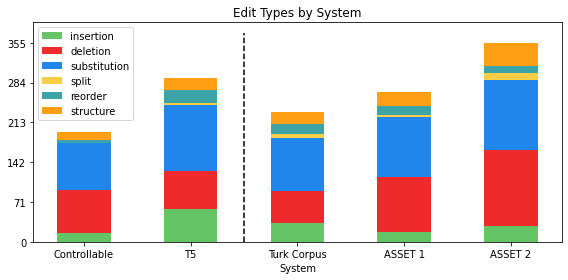

In [9]:
edit_type_by_system(data, flipped=True)

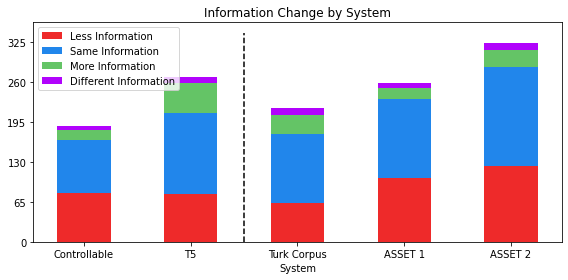

In [10]:
system_by_information_change(data)

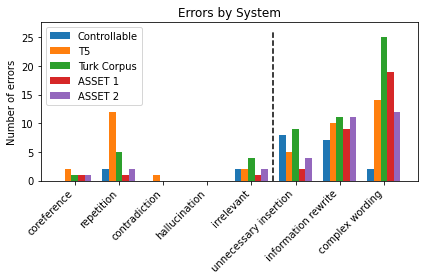

In [11]:
errors_by_system(data)

In [12]:
sankey_seperated(data)

In [13]:
sankey_combined(data)

In [14]:
# Prints the sentences where annotators identified insertion errors
for error in [Error.REPETITION, Error.CONTRADICTION, Error.HALLUCINATION, Error.IRRELEVANT]:
    print(f'\n{error.value}')
    for sent in data:
        for ann in sent['processed_annotations']:
            if ann['error_type'] == error:
                print(f'HIT {sent["id"]+1} \t {sent["user"]} \t {system_name_mapping[sent["system"]]}')


Repetition
HIT 23 	 anton 	 T5
HIT 23 	 ayush 	 T5
HIT 58 	 vinayak 	 T5
HIT 58 	 vinayak 	 T5
HIT 60 	 vinayak 	 Turk Corpus
HIT 60 	 vinayak 	 Turk Corpus
HIT 60 	 vinayak 	 Turk Corpus
HIT 68 	 vinayak 	 T5
HIT 69 	 vinayak 	 ASSET 1
HIT 114 	 anton 	 T5
HIT 120 	 anton 	 Controllable
HIT 114 	 kelly 	 T5
HIT 120 	 kelly 	 Controllable
HIT 127 	 rachel 	 T5
HIT 134 	 rachel 	 Turk Corpus
HIT 135 	 rachel 	 T5
HIT 125 	 vinayak 	 ASSET 2
HIT 135 	 vinayak 	 T5
HIT 135 	 vinayak 	 T5
HIT 125 	 vishnesh 	 ASSET 2
HIT 134 	 vishnesh 	 Turk Corpus
HIT 135 	 vishnesh 	 T5

Contradiction
HIT 8 	 kelly 	 T5

Hallucination

Irrelevant
HIT 29 	 anton 	 Controllable
HIT 31 	 anton 	 ASSET 2
HIT 23 	 kelly 	 T5
HIT 50 	 kelly 	 ASSET 1
HIT 60 	 vinayak 	 Turk Corpus
HIT 75 	 vinayak 	 ASSET 2
HIT 60 	 vishnesh 	 Turk Corpus
HIT 60 	 vishnesh 	 Turk Corpus
HIT 105 	 anton 	 Turk Corpus
HIT 114 	 ayush 	 T5
HIT 120 	 ayush 	 Controllable


In [15]:
# Print the avg. sentence scores for each system
for s in systems:
    print(f'{system_name_mapping[s]} \t {avg([sent["score"] for sent in data if sent["system"] == s])}')

T5 	 1.82
ASSET 1 	 6.67
Turk Corpus 	 4.08
ASSET 2 	 6.24
Controllable 	 1.78


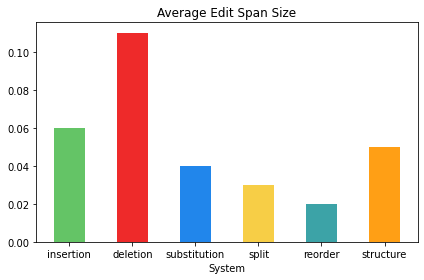

In [16]:
annotations = [x for y in [sent['processed_annotations'] for sent in data] for x in y]
avg_span_size(annotations)

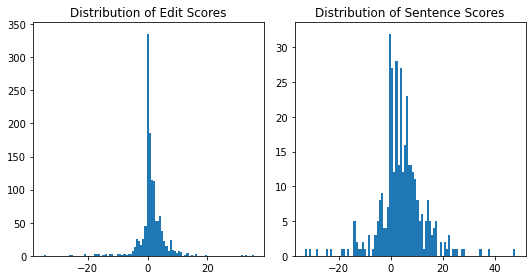

In [17]:
# Show the distribution of edit and sentence scores
score_distribution(data)

In [18]:
# Get the best and worst performing sentences
best, worst = best_performing(data)

Highest Scoring:
anton - Batch 1, HIT 17 (ID 16) - 47.72427404289902
vinayak - Batch 2, HIT 21 (ID 70) - 37.32095913250717
kelly - Batch 1, HIT 47 (ID 46) - 34.28827424615905
kelly - Batch 1, HIT 11 (ID 10) - 28.166154338723288
vinayak - Batch 4, HIT 3 (ID 122) - 26.831672218681597

Lowest scoring:
anton - Batch 3, HIT 14 (ID 113) - -32.79059932310388
vishnesh - Batch 2, HIT 21 (ID 70) - -31.044478156312206
ayush - Batch 3, HIT 14 (ID 113) - -28.46187468298353
vinayak - Batch 2, HIT 31 (ID 80) - -24.01313861905048
anton - Batch 3, HIT 20 (ID 119) - -22.651010785711982


In [24]:
# Get setences with a score of 0
zeros = zero_scoring_sents(data)

ayush - Batch 3, HIT 4 (ID 103)


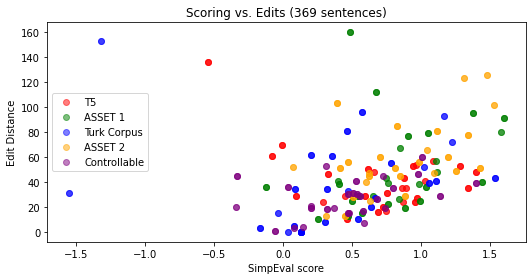

In [20]:
edit_length(data, systems, simpeval=True)

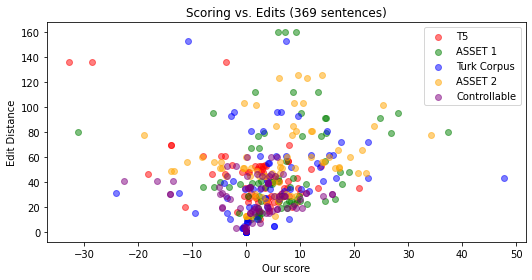

In [21]:
edit_length(data, systems, simpeval=False)

In [22]:
# Get sentences with at least 1 structure change from 1 annotator
ids = set()
for sent in data:
    if 'structure' in [x['type'] for x in sent['edits']]:
        ids.add(sent['id'])
ids = sorted(list(ids))
print(f'Sentences with at least 1 structure change: {len(ids)} / {len(data)}')

Sentences with at least 1 structure change: 61 / 369


anton - Batch 1, HIT 8 (ID 7)

Tajikistan, Turkmenistan and Uzbekistan border Afghanistan to the north, Iran to the west, Pakistan to the south and the People's Republic of China to the east.
Afghanistan is to the north, Iran is to the west, Pakistan is to the south, and the People's Republic of China is to the east of Pakistan.

ayush - Batch 1, HIT 8 (ID 7)

Tajikistan, Turkmenistan and Uzbekistan border Afghanistan to the north, Iran to the west, Pakistan to the south and the People's Republic of China to the east.
Afghanistan is to the north, Iran is to the west, Pakistan is to the south, and the People's Republic of China is to the east of Pakistan.



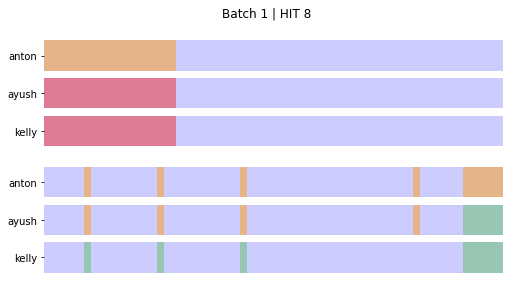

In [23]:
# Display a sentence with a structure change
id_ = 0
sents = [sent for sent in data if sent['id'] == ids[id_]]
print_changes(sents)
draw_agreement(sents)